In [8]:
import pandas as pd

In [16]:
df1 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\satu.csv")
df2 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\dua.csv")
df3 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\-tiga.csv")
df4 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\empat.csv")
df5 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\lima.csv")
df6 = pd.read_csv("D:\Data Scrape Renote11\dataset-renot11\enam.csv")


In [24]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [87]:
pd.options.display.max_rows=10 #mengubah setingan default max rows
df #cek data per baris 60, apa ada masalah header

,#,Product Name,Product URL,Price,Category,Reviews,Sold,Views,Rating,Seller Name,Seller URL,Location,Error
0,1,XIAOMI REDMI NOTE 4X 4/64GB,https://www.tokopedia.com/daystoresid/xiaomi-r...,905000,Android OS,7,33,5356,4.4,daystore_id,https://www.tokopedia.com/daystoresid,Jakarta Pusat,False
1,2,Redmi Note 11 4/128 Gb New Garansi Resmi,https://www.tokopedia.com/archive-bilqissadity...,2430000,Android OS,67,211,1247,5.0,Century Fast,https://www.tokopedia.com/archive-bilqissaditya,Kota Surakarta,False
2,3,Redmi Note 11 4/128 GB Garansi Resmi Xiaomi In...,https://www.tokopedia.com/newsantbrinashop/red...,2440000,Android OS,35,134,1068,5.0,NewSantBrina Shop,https://www.tokopedia.com/newsantbrinashop,Kota Surakarta,False
3,4,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi - ...,https://www.tokopedia.com/abiansimon/xiaomi-re...,2459000,Android OS,24,87,620,5.0,Abian Simon Official,https://www.tokopedia.com/abiansimon,Kota Surakarta,False
4,5,Redmi Note 11 4/128 Gb garansi resmi - Star blue,https://www.tokopedia.com/maritsa22/redmi-note...,2435000,Android OS,31,123,600,5.0,maritsa_store,https://www.tokopedia.com/maritsa22,Kab. Karanganyar,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,XIAOMI REDMI NOTE 11 4Gb 128Gb,https://www.tokopedia.com/drsanga/xiaomi-redmi...,2599000,Android OS,0,0,15,0.0,Sembilan Cell & Computer,https://www.tokopedia.com/drsanga,Kab. Cilacap,False
57,58,Redmi Note 11 4/128 Ram 4gb internal 128gb Gar...,https://www.tokopedia.com/x9phone/redmi-note-1...,2450000,Android OS,0,0,28,0.0,X9 Phone,https://www.tokopedia.com/x9phone,Kab. Banyumas,False
58,59,REDMI NOTE 11 4/128 GB NFC Snapdragon 680 Amol...,https://www.tokopedia.com/siangmalam/redmi-not...,2470000,Android OS,0,0,26,0.0,Siang_malam_,https://www.tokopedia.com/siangmalam,Kota Bekasi,False
59,60,(GRATIS ONGKIR) Xiaomi Redmi Note 11 (4Gb+128G...,https://www.tokopedia.com/goodmerchant/gratis-...,2390000,Android OS,0,0,29,0.0,Good Merchant,https://www.tokopedia.com/goodmerchant,Kota Tangerang,False


In [64]:
df_name = df.loc[:, ['Product Name']]
df_name.describe() #sepertinya ada produk lain selain xiaomi redmi note 11

,Product Name
count,338
unique,278
top,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi
freq,11


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

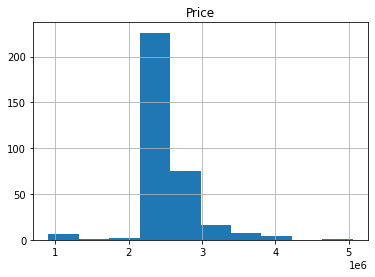

In [54]:
#belum bisa disimpulkan terdapat 278 nama produk yang berbeda, karena produk yang sama memiliki kombinasi nama yang beda
df_price = df.loc[:,['Product Name', 'Price']]
df_price.hist()

In [122]:
#mencoba menyaring produk yang saya ingingkan, redmi note 11.
#karena satu produk memiliki banyak kombinasi, maka saya cari pattern yang sesuai dg produk dan kombinasinya
pat1 = r"[note][ ][11]" 
pat2 = r"[Note][ ][11]" 
pat3 = r"[NOTE][ ][11]" 
df_pat1 = df.loc[df['Product Name'].str.contains(pat1), ['Product Name','Price']] #bisa tambahkan kolom Seller Name utk pembeda
df_pat2 = df.loc[df['Product Name'].str.contains(pat2), ['Product Name','Price']]
df_pat3 = df.loc[df['Product Name'].str.contains(pat3), ['Product Name','Price']]
pd.options.display.max_rows=10
df_name = pd.concat([df_pat1, df_pat3]) #pat1 dan pat2 itu menghasilkan hal yang sama. lihat simulasi di bawah
df_name

,Product Name,Price
1,Redmi Note 11 4/128 Gb New Garansi Resmi,2430000
2,Redmi Note 11 4/128 GB Garansi Resmi Xiaomi In...,2440000
3,Xiaomi Redmi Note 11 4/128 GB Garansi Resmi - ...,2459000
4,Redmi Note 11 4/128 Gb garansi resmi - Star blue,2435000
5,Redmi Note 11 4/128 GB Garansi Resmi - Star Blue,2450000
...,...,...
48,XIAOMI REDMI NOTE 11 - 4GB 128GB 4/128 SNAPDRA...,2899000
50,XIAOMI REDMI NOTE 11 - 4GB 128GB 4/128 SNAPDRA...,2899000
52,XIAOMI REDMI NOTE 11 4GB+128GB No Repack,2500000
56,XIAOMI REDMI NOTE 11 4Gb 128Gb,2599000


In [101]:
# dari hasil di atas ternyata ada 8 produk yang tidak sesuai kriteria(338-330)
# gunakan ini untuk SIMULASI
pat1 = r"[note][ ][11]" 
pat2 = r"[Note][ ][11]" 
pat3 = r"[NOTE][ ][11]" 
x = pd.Series(['note 11', 'Note 11', 'NOTE 11'])
x.str.contains(pat3)


0    False
1    False
2     True
dtype: bool

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

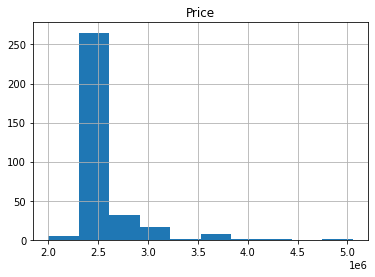

In [124]:
df_name.hist()

In [ ]:
#PR pelajari hist()